In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [4]:
df = pd.read_csv("tesla.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\shravan vibhas\AppData\Local\Temp\ipykernel_4720\2394721818.py:1: UserWarning:

Parsing '29-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shravan vibhas\AppData\Local\Temp\ipykernel_4720\2394721818.py:1: UserWarning:

Parsing '30-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shravan vibhas\AppData\Local\Temp\ipykernel_4720\2394721818.py:1: UserWarning:

Parsing '13-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shravan vibhas\AppData\Local\Temp\ipykernel_4720\2394721818.py:1: UserWarning:

Parsing '14-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\shravan vibhas\AppData\Local\Temp\ipykernel_4720\2394721818.py:1: UserWarning:

Parsing '15-07-2010' in DD/MM/YYYY format. Provide format or specify in

In [9]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}') 
print(f'Total days = {(df.Date.max()  - df.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days = 3617 days


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2193.0,1.756529e+02,1.155809e+02,16.139999,3.311000e+01,2.049900e+02,2.620000e+02,3.866900e+02
High,2193.0,1.787103e+02,1.173701e+02,16.629999,3.391000e+01,2.081600e+02,2.653300e+02,3.896100e+02
Low,2193.0,1.724121e+02,1.136548e+02,14.980000,3.246000e+01,2.016700e+02,2.562100e+02,3.793500e+02
Close,2193.0,1.756486e+02,1.155808e+02,15.800000,3.316000e+01,2.049900e+02,2.617400e+02,3.850000e+02
Adj Close,2193.0,1.756486e+02,1.155808e+02,15.800000,3.316000e+01,2.049900e+02,2.617400e+02,3.850000e+02
Volume,2193.0,5.077449e+06,4.545398e+06,118500.000000,1.577800e+06,4.171700e+06,6.885600e+06,3.716390e+07


<AxesSubplot:>

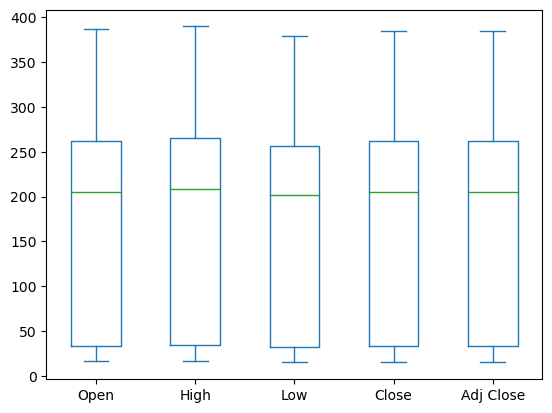

In [26]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [11]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

df_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

In [12]:
iplot(plot)

In [13]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [33]:
#Split the data into train and test sets
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [34]:
X = np.array(df.index).reshape(-1,1)
X

array([[   0],
       [   1],
       [   2],
       ...,
       [2190],
       [2191],
       [2192]], dtype=int64)

In [35]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [38]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [39]:
iplot(plot2)

In [40]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

